In [3]:
import googleapiclient.discovery
from dotenv import load_dotenv
import os

load_dotenv()

def get_comments(video_id):
    api_key = os.getenv('YOUTUBE_API_KEY')
    youtube = googleapiclient.discovery.build("youtube", "v3", developerKey=api_key)
    
    comments = []
    request = youtube.commentThreads().list(
        part="snippet",
        videoId=video_id,
        maxResults=100
    )
    
    while request is not None:
        response = request.execute()
        for item in response['items']:
            comment = item['snippet']['topLevelComment']['snippet']['textOriginal']
            comments.append(comment)
        
        if 'nextPageToken' in response:
            request = youtube.commentThreads().list(
                part="snippet",
                videoId=video_id,
                pageToken=response['nextPageToken'],
                maxResults=100
            )
        else:
            break
    
    return comments

video_id = 'ClfzeZmRYro'
comments = get_comments(video_id)
print(comments)


['Never known defeat, no joke', 'The question though is: can 3 Malenias beat 1 ‘Let Me Solo Her’?', "I started the game late and I haven't faced Rennala yet.\nYour videos dude freak me out", 'Alecto black knife ring leader', 'Malenia is not even that good I killed it 1 try', 'These are no longer two, but three of godskin', 'Should do 3 pairs of God Skin Duo.', 'Lol if anything this shows how BS heavy weapon stagger builds are', 'Can 10 Margitt beat other boss?', 'Once again maliketh  is the strongest boss', "How fitting that it was scarlett rot caused by three angry dogs was what finally killed after she just wiped the floor with three gods.  Really curious to see how three Placidecuxes, three Elden Beasts & three Rykards would've faired against her, but her arena is definitely too small for them. When I actually play the game myself I'm excited but also terrified to go against her.", 'The way Morgott survived round 1 was clutch.', 'Even with fast pace animal Maliketh it ended up in a 

In [4]:
import re

def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#','', text)
    text = re.sub(r"[^a-zA-Z]", " ", text)
    text = text.lower()
    text = text.strip()
    return text

cleaned_comments = [clean_text(comment) for comment in comments]


In [6]:
%pip install vaderSentiment

  Obtaining dependency information for vaderSentiment from https://files.pythonhosted.org/packages/76/fc/310e16254683c1ed35eeb97386986d6c00bc29df17ce280aed64d55537e9/vaderSentiment-3.3.2-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
   --- ------------------------------------ 10.2/126.0 kB ? eta -:--:--
   --- ------------------------------------ 10.2/126.0 kB ? eta -:--:--
   --------- ----------------------------- 30.7/126.0 kB 187.9 kB/s eta 0:00:01
   --------- ----------------------------- 30.7/126.0 kB 187.9 kB/s eta 0:00:01
   ------------------------- ------------- 81.9/126.0 kB 328.8 kB/s eta 0:00:01
   ---------------------------- ---------- 92.2/126.0 kB 327.7 kB/s eta 0:00:01
   -------------------------------------- 126.0/126.0 kB 411.8 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def analyze_sentiment(comments):
    analyzer = SentimentIntensityAnalyzer()
    sentiments = {'positive': 0, 'neutral': 0, 'negative': 0}
    for comment in comments:
        vs = analyzer.polarity_scores(comment)
        if vs['compound'] >= 0.05:
            sentiments['positive'] += 1
        elif vs['compound'] <= -0.05:
            sentiments['negative'] += 1
        else:
            sentiments['neutral'] += 1
    total = len(comments)
    for sentiment in sentiments:
        sentiments[sentiment] = (sentiments[sentiment] / total) * 100
    return sentiments

sentiment_results = analyze_sentiment(cleaned_comments)
print(f"Sentiment analysis results: {sentiment_results}")


Sentiment analysis results: {'positive': 32.63054670262319, 'neutral': 29.83574405491542, 'negative': 37.53370924246139}


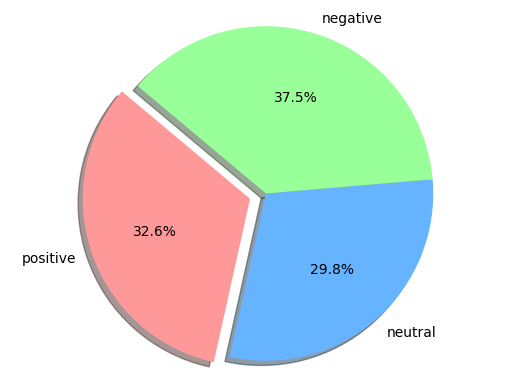

In [8]:
import matplotlib.pyplot as plt

def plot_sentiments(sentiment_results):
    labels = sentiment_results.keys()
    sizes = sentiment_results.values()
    colors = ['#ff9999','#66b3ff','#99ff99']
    explode = (0.1, 0, 0)

    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
            autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')
    plt.show()

plot_sentiments(sentiment_results)


In [10]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
%pip install wordcloud
from wordcloud import WordCloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   ------- ------------------------------- 61.4/300.2 kB 326.1 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/300.2 kB 401.6 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/300.2 kB 401.6 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/300.2 kB 401.6 kB/s eta 0:00:01
   ------------------------ ------------- 194.6/300.2 kB 535.8 kB/s eta 0:00:01
   ------------------------ -


[notice] A new release of pip is available: 23.2.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import nltk
nltk.download('stopwords')
nltk.download('punkt')

def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#','', text)
    text = re.sub(r"[^a-zA-Z]", " ", text)
    text = text.lower()
    text = text.strip()
    return text

def extract_keywords(comments):
    stop_words = set(stopwords.words('english'))
    all_words = ' '.join(comments)
    all_words = clean_text(all_words)
    word_tokens = word_tokenize(all_words)
    
    filtered_words = [word for word in word_tokens if word not in stop_words and len(word) > 1]
    freq_dist = FreqDist(filtered_words)
    most_common = freq_dist.most_common(10)
    words, counts = zip(*most_common)
    
    plt.figure(figsize=(10, 6))
    plt.bar(words, counts, color='skyblue')
    plt.title('Top 10 Keywords')
    plt.xlabel('Keywords')
    plt.ylabel('Frequency')
    plt.show()

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dist)
    
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Comments')
    plt.show()





[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rajkumar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Rajkumar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


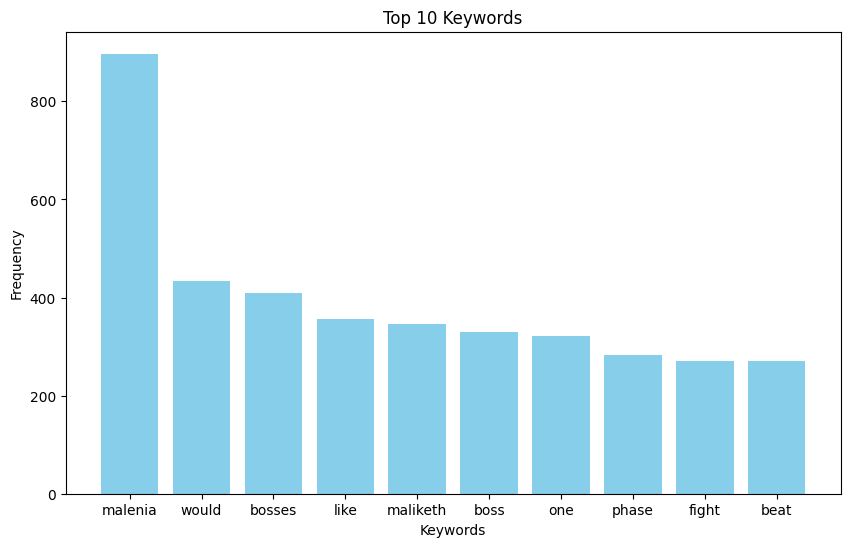

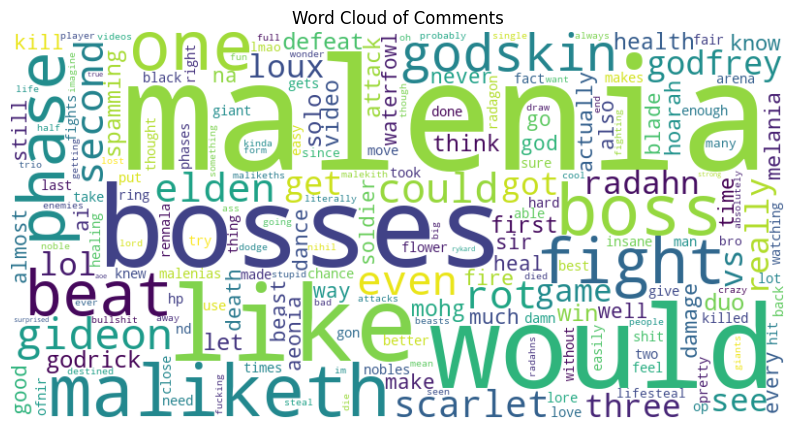

In [15]:
cleaned_comments = [clean_text(comment) for comment in comments]
extract_keywords(cleaned_comments)